### Итоговый проект

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS

In [2]:
pd.options.display.max_columns = 100

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
data.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [5]:
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199         B         B        11      2748   
1         1.0       1977   0.075779         B         B         6      1437   
2         5.0       1909   0.000000         B         B        30      7538   
3        22.0       2007   0.101872         B         B        23      4583   
4        17.0       2017   0.072158         B         B         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         1           NaN            0        0       B  
1         3           NaN            0        2       B  
2        87        4702.0            5        5       B  
3         3           NaN            3        3       B  
4         1           NaN            0        0       A

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [8]:
data.shape

(10000, 20)

In [9]:
test.shape

(5000, 19)

In [10]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [11]:
test.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.449500    36.158810   
std     4832.674037    44.179466     0.838594    19.092787    17.825287   
min        1.000000     0.000000     0.000000     1.378543     0.333490   
25%     4221.750000    21.000000     1.000000    41.906231    23.092026   
50%     8320.500000    37.000000     2.000000    52.921340    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        5.976800     8.632000    12.601000  1984.392600     0.119874   
std         9.950018     5.483228     6.789213    18.573149     0.120070   
min         0.000000     1.000000     0.000000  1908.000000     0.000000   
25%         1.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    12.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max       620.000000    78.000000    99.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   2623.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1146.657263      1.31940   
std      17.532202   4026.614773    23.863762   1044.744231      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    325.000000      0.00000   
50%      25.000000   5285.000000     2.000000    900.000000      1.00000   
75%      36.000000   7287.000000     5.000000   1548.000000      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  
count  5000.000000  
mean      4.242800  
std       4.777365  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       6.000000  
max      23.000000

### Чистим комнаты

In [12]:
data['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [13]:
test['Rooms'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  0., 17.])

In [14]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [15]:
data = data.loc[data['Rooms'].between(1, 9), :]

In [16]:
data.shape

(9989, 20)

In [17]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [18]:
train.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   6992.000000  6992.000000  6992.000000  6992.000000  5510.000000   
mean    8431.032323    50.535469     1.887300    56.296454    37.821344   
std     4856.704812    43.624608     0.812327    21.694047   102.509998   
min        0.000000     0.000000     1.000000     1.136859     0.370619   
25%     4242.750000    18.000000     1.000000    41.743594    22.736747   
50%     8456.500000    37.000000     2.000000    52.319880    32.810189   
75%    12633.750000    75.000000     2.000000    65.890324    45.330426   
max    16798.000000   209.000000     6.000000   641.065193  7480.592129   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    6992.000000  6992.000000  6992.000000  6.992000e+03  6992.000000   
mean        6.170051     8.504577    12.617420  4.852591e+03     0.119765   
std        24.604527     5.255343     6.751803  2.397807e+05     0.119821   
min         0.000000     1.000000     0.000000  1.912000e+03     0.000000   
25%         1.000000     4.000000     9.000000  1.973000e+03     0.017647   
50%         6.000000     7.000000    12.000000  1.977000e+03     0.075424   
75%         9.000000    12.000000    17.000000  2.000000e+03     0.195781   
max      2014.000000    42.000000    99.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  6992.000000   6992.000000  6992.000000   3701.000000  6992.000000   
mean     24.566076   5298.582523     7.850400   1146.815455     1.321653   
std      17.361642   3932.233864    23.349415   1028.431221     1.489850   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      35.000000   7077.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  6992.000000    6992.000000  
mean      4.194937  214381.254531  
std       4.741302   92973.400264  
min       0.000000   59174.778028  
25%       1.000000  153820.176034  
50%       3.000000  192476.219671  
75%       5.000000  249094.379680  
max      23.000000  633233.466570

In [19]:
valid.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   2997.000000  2997.000000  2997.000000  2997.000000  2369.000000   
mean    8278.308976    50.163497     1.891892    56.295646    35.647437   
std     4864.106060    43.545879     0.813146    19.226223    17.317589   
min       14.000000     0.000000     1.000000     1.988943     1.049867   
25%     3988.000000    21.000000     1.000000    41.843474    22.844744   
50%     8287.000000    34.000000     2.000000    52.921386    32.645696   
75%    12464.000000    75.000000     2.000000    65.931228    44.430656   
max    16793.000000   208.000000     5.000000   275.645284   233.949309   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    2997.000000  2997.000000  2997.000000  2997.000000  2997.000000   
mean        6.525192     8.577578    12.610944  1985.455122     0.116685   
std        36.188745     5.201649     6.819638    18.487801     0.117265   
min         0.000000     1.000000     0.000000  1910.000000     0.000000   
25%         1.000000     4.000000     9.000000  1975.000000     0.017647   
50%         6.000000     7.000000    14.000000  1977.000000     0.075424   
75%         9.000000    12.000000    17.000000  2002.000000     0.194489   
max      1970.000000    32.000000   117.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  2997.000000   2997.000000  2997.000000   1498.000000  2997.000000   
mean     24.986987   5479.962629     8.506840   1134.360481     1.315649   
std      17.907831   4168.408267    24.956819   1005.023824     1.502045   
min       0.000000    168.000000     0.000000     30.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5288.000000     2.000000    990.000000     1.000000   
75%      36.000000   7614.000000     5.000000   1547.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  2997.000000    2997.000000  
mean      4.320988  213634.766768  
std       4.954506   92701.877540  
min       0.000000   60828.260686  
25%       1.000000  154119.312253  
50%       3.000000  191091.968972  
75%       6.000000  249915.522011  
max      23.000000  622888.825328

In [20]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 5847 to 5588
Data columns (total 20 columns):
Id               2997 non-null int64
DistrictId       2997 non-null int64
Rooms            2997 non-null float64
Square           2997 non-null float64
LifeSquare       2369 non-null float64
KitchenSquare    2997 non-null float64
Floor            2997 non-null int64
HouseFloor       2997 non-null float64
HouseYear        2997 non-null int64
Ecology_1        2997 non-null float64
Ecology_2        2997 non-null object
Ecology_3        2997 non-null object
Social_1         2997 non-null int64
Social_2         2997 non-null int64
Social_3         2997 non-null int64
Healthcare_1     1498 non-null float64
Helthcare_2      2997 non-null int64
Shops_1          2997 non-null int64
Shops_2          2997 non-null object
Price            2997 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 491.7+ KB


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 5220 to 7279
Data columns (total 20 columns):
Id               6992 non-null int64
DistrictId       6992 non-null int64
Rooms            6992 non-null float64
Square           6992 non-null float64
LifeSquare       5510 non-null float64
KitchenSquare    6992 non-null float64
Floor            6992 non-null int64
HouseFloor       6992 non-null float64
HouseYear        6992 non-null int64
Ecology_1        6992 non-null float64
Ecology_2        6992 non-null object
Ecology_3        6992 non-null object
Social_1         6992 non-null int64
Social_2         6992 non-null int64
Social_3         6992 non-null int64
Healthcare_1     3701 non-null float64
Helthcare_2      6992 non-null int64
Shops_1          6992 non-null int64
Shops_2          6992 non-null object
Price            6992 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
train['Rooms'].value_counts()

2.0    2693
1.0    2606
3.0    1581
4.0     100
5.0      11
6.0       1
Name: Rooms, dtype: int64

In [23]:
valid['Rooms'].value_counts()

2.0    1187
1.0    1099
3.0     654
4.0      50
5.0       7
Name: Rooms, dtype: int64

In [24]:
test['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [25]:
train.groupby(['Rooms'])['Square'].mean()

Rooms
1.0     41.405811
2.0     56.818368
3.0     76.959320
4.0     98.428475
5.0    103.131765
6.0     59.414334
Name: Square, dtype: float64

In [26]:
valid.groupby(['Rooms'])['Square'].mean()

Rooms
1.0     41.127570
2.0     56.719801
3.0     76.767651
4.0     98.275682
5.0    153.231361
Name: Square, dtype: float64

In [27]:
test.groupby(['Rooms'])['Square'].mean()

Rooms
0.0      96.584677
1.0      40.943143
2.0      56.689144
3.0      77.201304
4.0      94.501365
5.0     115.788971
6.0     167.101957
17.0     52.866107
Name: Square, dtype: float64

In [28]:
test.loc[test['Rooms'] == 17, :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
3398  1435         111   17.0  52.866107   32.528342            8.0     15   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
3398        17.0       1987   0.093443         B         B        23   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
3398      4635         5        3300.0            2        4       B

In [29]:
test.loc[test['Rooms'] == 17, 'Rooms'] = round(train.loc[train['Square'].between(50,60), 'Rooms'].mean())

In [30]:
train.loc[train['Rooms'] == 6, :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
2170  14003          99    6.0  59.414334   38.702244            6.0      7   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2170         9.0       1969   0.033494         B         B        66   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
2170     10573         1        1322.0            3        8       B   

              Price  
2170  229661.964416

In [31]:
train.loc[(train['DistrictId'] == 99) & (train['Square'].between(55,65)), :].groupby(['Rooms'])['Price'].mean()

Rooms
2.0    204685.595782
3.0    202974.711880
6.0    229661.964416
Name: Price, dtype: float64

In [32]:
train.loc[train['Rooms'] == 6, 'Rooms'] = round(train.loc[train['Square'].between(55,65), 'Rooms'].mean())

In [33]:
test.loc[test['Rooms'] == 0, :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2406   3343          58    0.0  116.824201  113.692424            0.0      3   
2524  10729          27    0.0   76.345154   42.820796           12.0     14   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2406         3.0       1977   0.437885         B         B        23   
2524         0.0       1977   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
2406      5735         3        1084.0            0        5       B  
2524       469         0           NaN            0        0       B

In [34]:
test.loc[(test['Rooms'] == 0) & 
         (test['Square'].between(110,125)), 
         'Rooms'] = round(train.loc[train['Square'].between(110,125), 'Rooms'].mean())

In [35]:
test.loc[(test['Rooms'] == 0) &
         (test['Square'].between(60,85)), 
         'Rooms'] = round(train.loc[train['Square'].between(60,85), 'Rooms'].mean())

In [36]:
test.loc[test['Rooms'] == 6, :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2071  10793          23    6.0  110.750226         NaN            0.0      2   
3217   4058          27    6.0  223.453689  104.113552           16.0      2   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2071         2.0       2015   0.014073         B         B         2   
3217         2.0       2017   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
2071       475         0           NaN            0        0       B  
3217     14892         4           NaN            1        4       B

Text(0, 0.5, 'Price')

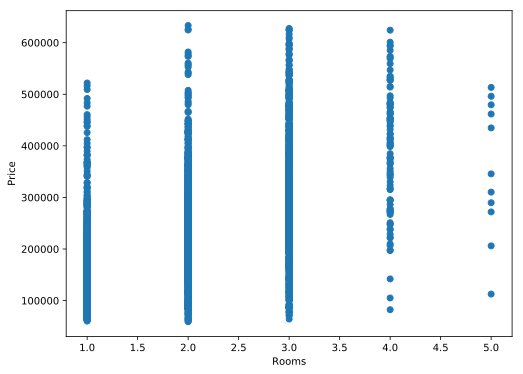

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(train['Rooms'], train['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

### Чистим площадь

Text(0, 0.5, 'Price')

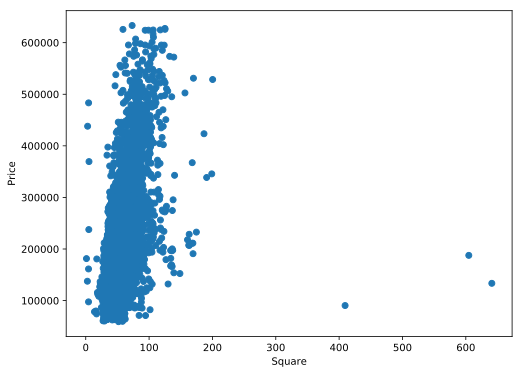

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(train['Square'], train['Price'])
plt.xlabel('Square')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

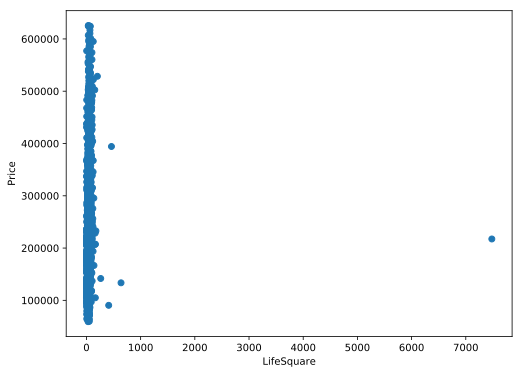

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(train['LifeSquare'], train['Price'])
plt.xlabel('LifeSquare')
plt.ylabel('Price')

In [40]:
train.loc[train['LifeSquare'] > 1000, :]

Id  DistrictId  Rooms     Square   LifeSquare  KitchenSquare  Floor  \
4328  16550          27    3.0  81.694417  7480.592129            1.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4328        17.0       2016   0.017647         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4328       469         0           NaN            0        0       B   

              Price  
4328  217357.492366

In [41]:
train.loc[(train['LifeSquare'] < 1000) & (train['Rooms'] == 3), 'LifeSquare'].mean()

51.38654303278391

In [42]:
train.loc[train['LifeSquare'] > 1000, 'LifeSquare'] = train.loc[(train['LifeSquare'] < 1000) & 
                                                     (train['Rooms'] == 3), 'LifeSquare'].mean()

In [43]:
train.loc[train['Square'] <10, :]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
8030  13265           1    3.0  4.823679   79.767964            0.0      6   
3413   9487           5    1.0  5.129222    5.549458            1.0      1   
6392  14786           1    1.0  1.136859    4.525736            1.0      3   
3280  10527          27    1.0  4.380726   40.805837            1.0     10   
9613   7657          38    1.0  4.502784    4.618547            1.0     28   
9294   6782          45    1.0  2.954309    5.257278            1.0      3   
1608  10202           6    1.0  2.596351    4.604943            1.0      3   
4900   4504          27    3.0  4.390331    5.610772            1.0      8   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8030        17.0       1977   0.007122         B         B         1   
3413         1.0       1977   0.150818         B         B        16   
6392         1.0       1977   0.007122         B         B         1   
3280        17.0       2013   0.211401         B         B         9   
9613         1.0       1977   0.060753         B         B        15   
9294         1.0       1977   0.195781         B         B        23   
1608        25.0       2014   0.243205         B         B         5   
4900        19.0       2016   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8030       264         0           NaN            0        1       B   
3413      3433         4        2643.0            4        5       B   
6392       264         0           NaN            0        1       B   
3280      1892         0           NaN            0        1       B   
9613      2787         2         520.0            0        7       B   
9294      5212         6           NaN            3        2       B   
1608      1564         0         540.0            0        0       B   
4900      1892         0           NaN            0        1       B   

              Price  
8030  237716.681261  
3413  369472.403061  
6392  181434.825589  
3280   97560.720383  
9613  483283.488083  
9294  438005.182323  
1608  137597.601458  
4900  161379.067034

In [44]:
valid.loc[valid['Square'] <10, :]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
1316  11526          27    1.0  4.633498    1.969969            1.0     18   
212    1748          88    2.0  5.497061   67.628717            1.0     24   
8283  15744          34    1.0  1.988943    2.642219            1.0     21   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1316         1.0       1977   0.011654         B         B         4   
212         22.0       1977   0.127376         B         B        43   
8283         4.0       1977   0.069753         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1316       915         0           NaN            0        0       B   
212       8429         3           NaN            3        9       B   
8283     13670         4           NaN            1       11       B   

              Price  
1316  107604.269441  
212   412511.088764  
8283  458378.777006

In [45]:
test.loc[test['Square'] <10, :]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
66     9011          53    1.0  1.378543    1.353573            1.0      1   
608   16401          30    1.0  2.645046    4.338755            1.0      2   
837    2138          27    1.0  5.647458    1.501582            1.0      1   
1165  10120           6    1.0  5.100672    3.861780            1.0      3   
4490   1165          27    1.0  2.372101    1.899119            1.0      2   
4540   7855           6    1.0  4.967143    2.968086            1.0      3   
4713    170           6    2.0  2.900586   61.468563            1.0     18   
4902   1420          45    1.0  1.975769    2.900371            1.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
66           1.0       1977   0.049637         B         B        34   
608          1.0       1977   0.000078         B         B        22   
837          1.0       1977   0.017647         B         B         2   
1165         1.0       1977   0.243205         B         B         5   
4490        17.0       1977   0.011654         B         B         4   
4540         1.0       2018   0.243205         B         B         5   
4713        17.0       2014   0.243205         B         B         5   
4902         1.0       1977   0.195781         B         B        23   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
66        7759         0         229.0            1        3       B  
608       6398       141        1046.0            3       23       B  
837        469         0           NaN            0        0       B  
1165      1564         0         540.0            0        0       B  
4490       915         0           NaN            0        0       B  
4540      1564         0         540.0            0        0       B  
4713      1564         0         540.0            0        0       B  
4902      5212         6           NaN            3        2       B

In [46]:
train.shape

(6992, 20)

In [47]:
valid.shape

(2997, 20)

In [48]:
train = train.loc[~(train['Square'] <10), :]

In [49]:
valid = valid.loc[~(valid['Square'] <10), :]

In [50]:
train.shape

(6984, 20)

In [51]:
valid.shape

(2994, 20)

In [52]:
train.loc[train['Square'] > 250, :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
6977  11602          30    2.0  641.065193  638.163193           10.0     20   
4690   2307         102    1.0  409.425181  410.639749           10.0      4   
4262     28           9    2.0  604.705972         NaN            1.0     17   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
6977        19.0       2019   0.000078         B         B        22   
4690         4.0       2016   0.238617         B         B        26   
4262        18.0       1977   0.161532         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
6977      6398       141        1046.0            3       23       B   
4690      3889         6         705.0            3        6       B   
4262      5648         1          30.0            2        4       B   

              Price  
6977  133529.681562  
4690   90470.430830  
4262  187717.242538

In [53]:
valid.loc[valid['Square'] > 250, :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1982  5548          86    5.0  275.645284  233.949309           26.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1982        37.0       2011   0.161976         B         A        31   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1982      7010         5        4508.0            3        7       B   

              Price  
1982  455264.882666

In [54]:
train = train.loc[~(train['Square'] >250), :]

In [55]:
train.shape

(6981, 20)

Text(0, 0.5, 'Price')

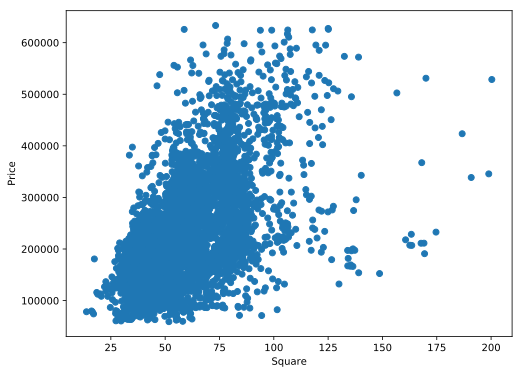

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(train['Square'], train['Price'])
plt.xlabel('Square')
plt.ylabel('Price')

In [57]:
test.groupby(['Rooms'])['Square'].mean()

Rooms
1.0     40.943143
2.0     56.687262
3.0     77.236515
4.0     94.501365
5.0    115.788971
6.0    167.101957
Name: Square, dtype: float64

Text(0, 0.5, 'Price')

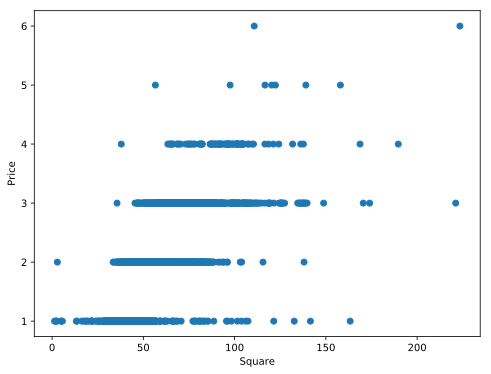

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(test['Square'], test['Rooms'])
plt.xlabel('Square')
plt.ylabel('Price')

In [59]:
test.loc[(test['Square'] < 10) | (test['Square'] > 200), :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
66     9011          53    1.0    1.378543    1.353573            1.0      1   
608   16401          30    1.0    2.645046    4.338755            1.0      2   
837    2138          27    1.0    5.647458    1.501582            1.0      1   
1165  10120           6    1.0    5.100672    3.861780            1.0      3   
3217   4058          27    6.0  223.453689  104.113552           16.0      2   
3909   1397          76    3.0  221.138768  118.055342            4.0     32   
4490   1165          27    1.0    2.372101    1.899119            1.0      2   
4540   7855           6    1.0    4.967143    2.968086            1.0      3   
4713    170           6    2.0    2.900586   61.468563            1.0     18   
4902   1420          45    1.0    1.975769    2.900371            1.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
66           1.0       1977   0.049637         B         B        34   
608          1.0       1977   0.000078         B         B        22   
837          1.0       1977   0.017647         B         B         2   
1165         1.0       1977   0.243205         B         B         5   
3217         2.0       2017   0.041116         B         B        53   
3909        48.0       2011   0.000000         B         B         7   
4490        17.0       1977   0.011654         B         B         4   
4540         1.0       2018   0.243205         B         B         5   
4713        17.0       2014   0.243205         B         B         5   
4902         1.0       1977   0.195781         B         B        23   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
66        7759         0         229.0            1        3       B  
608       6398       141        1046.0            3       23       B  
837        469         0           NaN            0        0       B  
1165      1564         0         540.0            0        0       B  
3217     14892         4           NaN            1        4       B  
3909      1660        39        1786.0            1        5       B  
4490       915         0           NaN            0        0       B  
4540      1564         0         540.0            0        0       B  
4713      1564         0         540.0            0        0       B  
4902      5212         6           NaN            3        2       B

In [60]:
train.loc[train['Rooms'] == 1, 'Square'].mean()

41.351834724805556

In [61]:
train.loc[train['Rooms'] == 2, 'Square'].mean()

56.39877737859517

In [62]:
test.loc[(test['Square'] < 10) & (test['Rooms'] == 1), 'Square'] = train.loc[train['Rooms'] == 1, 'Square'].mean()

In [63]:
test.loc[(test['Square'] < 10), :]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
4713  170           6    2.0  2.900586   61.468563            1.0     18   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4713        17.0       2014   0.243205         B         B         5   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
4713      1564         0         540.0            0        0       B

In [64]:
Square_percent = 100 / (round((train['LifeSquare'] * 100 / train['Square']).mean()))
Square_percent

1.5384615384615385

In [65]:
test.loc[(test['Square'] < 10) & 
         (test['Rooms'] == 2), 'Square'] = test.loc[(test['Square'] < 10) & 
         (test['Rooms'] == 2), 'LifeSquare'] * Square_percent

In [66]:
train['LifeSquare'].isnull().sum()

1481

In [67]:
train.loc[(train['Square'] < train['LifeSquare']), :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
478   10391          62    1.0   37.498161   40.371530            1.0     21   
8232   7162          34    2.0   56.738764   57.510395           54.0     26   
9411  10952          45    3.0   78.198416   78.287390            1.0      4   
6699  14659          74    2.0   66.944203   67.660710            1.0      8   
1993  13533          27    2.0   64.061829   68.788241            1.0     20   
2409    404           1    1.0   37.659760   41.014271            1.0     12   
9250   2905          62    2.0   74.393929   76.775595            0.0      2   
9597    833          27    1.0   44.260288   45.602761           10.0      3   
7838     99           1    1.0   46.451371   47.249044           10.0     13   
9910  16568          27    4.0  200.334539  201.627361           25.0      1   
4301   1067          52    3.0   78.557145   79.356818            0.0     11   
8531   2541           1    2.0   53.828610   54.604015            1.0     19   
7351  15792           1    3.0   81.728604   83.918459            1.0      6   
4625  12559          23    2.0   53.088523   55.391092            0.0      3   
8961   2201           6    1.0   40.043234   41.984322            1.0      3   
4422   4159          52    1.0   44.190996   44.437184            1.0     11   
9871   6121          48    1.0   41.783808   41.944790            1.0     17   
574   14211          48    1.0   39.357596   40.015989            1.0     21   
2934   5616          85    3.0  105.443592  107.927859           15.0     11   
5901   9716          23    2.0   51.876933   53.983730            1.0      3   
5023  14153          23    1.0   35.400480   37.333753            1.0      4   
8450   1923          14    3.0   92.679268   96.559141            1.0      8   
9003  16015          62    3.0   85.726420   86.836992            1.0     11   
9626   3742           1    1.0   53.258610   56.655126            0.0      6   
7153  10776          63    1.0   40.711075   42.246859            8.0     10   
3782   1643           1    2.0   61.392429   62.426932           10.0      3   
1048  14898           1    3.0   87.551098   89.940585            1.0     10   
4600   6834          59    2.0   72.624679   73.225280            0.0     24   
379    8104          52    1.0   37.496336   38.964704           10.0      7   
1897  16657           6    2.0   66.129214   68.749463            1.0     17   
...     ...         ...    ...         ...         ...            ...    ...   
7035   8715          25    1.0   32.797538   34.671697            1.0     15   
2750   9838          23    2.0   54.906941   58.338478           10.0      3   
9878  11441          62    2.0   71.985335   72.453232            0.0      5   
7428   2137           9    2.0   46.469859   50.703196            9.0      2   
8700   2021          23    1.0   57.518481   60.270560            1.0      3   
6740   4802           9    3.0  102.056968  105.272335           10.0      2   
7339  16270         113    1.0   78.410874   78.814606           11.0      7   
2787   1236          30    1.0   27.264869   30.191527            1.0      6   
1123  14772          27    1.0   40.632456   41.968805            1.0     16   
6757   8670           1    2.0   60.786490   60.984862            1.0     19   
8978  12146          74    1.0   50.018643   52.942921            1.0      6   
5734  10013          30    2.0   62.219340   62.405338            1.0      4   
5185   6473          52    2.0   63.583599   63.923208            1.0      7   
9721    396          54    3.0  110.119100  110.333763            1.0      8   
9369   8427          27    2.0   51.718170   55.909389            1.0     17   
1844   7521          23    1.0   40.826898   41.546357            1.0     12   
3868    870           1    2.0   52.930910   55.160362            1.0      9   
1819   8303          27    1.0   36.686360   38.078618            1.0      5   
8059   40

In [68]:
train.loc[train['LifeSquare'].isnull(), :].groupby(['Rooms'])['Square'].mean()

Rooms
1.0     44.258186
2.0     63.892703
3.0     86.179044
4.0    118.958441
5.0     42.003293
Name: Square, dtype: float64

In [69]:
train.groupby(['Rooms'])['LifeSquare'].mean()

Rooms
1.0    25.419530
2.0    35.742027
3.0    51.399954
4.0    66.985726
5.0    73.643331
Name: LifeSquare, dtype: float64

In [70]:
LifeSquare_percent = round((train['LifeSquare'] * 100 / train['Square']).mean()) / 100
LifeSquare_percent

0.65

In [71]:
train['LifeSquare'] = train['LifeSquare'].fillna(train['Square'] * LifeSquare_percent)

In [72]:
valid['LifeSquare'] = valid['LifeSquare'].fillna(valid['Square'] * LifeSquare_percent)

In [73]:
train.loc[(train['Square'] < train['LifeSquare']), 'Id'].count()

346

In [74]:
valid.loc[(valid['Square'] < valid['LifeSquare']), 'Id'].count()

124

In [75]:
test.loc[(test['Square'] < test['LifeSquare']), :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2      5480         190    1.0   13.597819   15.948246           12.0      2   
27    11160          58    1.0   48.610661   48.752502            1.0      4   
39     6624          27    1.0   42.413793   42.434887           10.0     12   
43    11513           1    1.0   37.484057   40.593036            0.0      4   
70     1872          30    2.0   52.449057   52.798349            1.0     17   
102   10749           6    2.0   65.582572   66.675758            1.0      4   
143    3895          21    1.0   36.514818   37.209976            7.0     10   
206   16055          62    3.0  108.218901  108.272277           10.0      4   
261   16000          27    2.0   66.929231   68.087510           12.0      4   
272    9887           1    2.0   53.658350   54.975247           10.0     10   
284     256           6    1.0   38.870525   41.172814            1.0      9   
311    5551          30    3.0   86.698553   88.589150            1.0      9   
331    3288          34    2.0   57.210758   57.606464           10.0     22   
337    1320          23    2.0   54.350505   57.376990            1.0      4   
340    5017          27    2.0   57.331148   58.709650            0.0      4   
358    8205           1    3.0   75.541672   76.511240            0.0     15   
365   15028          27    2.0   42.408734   44.430314            1.0      9   
410   11533          94    2.0   48.713443  303.071094            6.0      5   
461    7431           1    3.0   85.628258   88.544990            1.0     13   
499   16274         113    1.0  103.763434  104.926922            1.0     21   
532   15265          30    1.0   46.183583   48.806486            0.0      4   
533    2740          27    1.0   45.079731   45.367920           10.0     15   
542     117          59    4.0  121.225250  122.180548            1.0     21   
577    7240          52    2.0   62.221256   64.935542           10.0     11   
605   11427          23    2.0   47.362595   49.554394           10.0     14   
625    2249          62    1.0   77.157675   78.281763           34.0      5   
713    3248          23    1.0   42.788999   43.557219            0.0      3   
760    7843           1    1.0   49.033079   50.817885            9.0     11   
790    7555           1    2.0   64.090708   65.297206           12.0      2   
800    7735          33    1.0   31.725006   33.088428            1.0      4   
...     ...         ...    ...         ...         ...            ...    ...   
4171   5618           1    1.0   40.882160   41.950730            1.0     17   
4175  11717           1    2.0   77.016094   77.532039            0.0     10   
4186   9198           6    1.0   38.274863   40.968843            1.0      3   
4239  10869          23    3.0   78.001888   82.566322            1.0     21   
4274   6580           1    1.0   66.077466   66.435231            1.0     15   
4298  13851          37    2.0   55.268653   57.789532           10.0     16   
4308  15509          27    2.0   55.439861   57.527243           10.0     15   
4317  12751           1    1.0   40.975606   43.489394            8.0     14   
4326  13404          23    1.0   38.102906   40.731161            1.0      7   
4371  16563          52    1.0   40.709074   41.243693            1.0      4   
4373  13847          53    1.0   38.620205   40.663508            1.0     21   
4394      9           6    1.0   38.800420   42.560690            1.0      3   
4405   5199          27    2.0   59.054990   61.647531           57.0     13   
4416   6720          27    3.0   81.877326   83.308259           10.0     16   
4422      1           1    2.0   83.061098   83.830248            0.0     10   
4441    986          14    3.0   59.204738   61.858134            5.0      6   
4483  13139          53    2.0   57.007214   58.897823            1.0     10   
4592   8236          48    2.0   80.613713   82.491799            1.0     20   
4615  115

In [76]:
test.loc[test['LifeSquare'].isnull(), :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1     15856          74    2.0   69.263183         NaN            1.0      6   
5      7633          53    1.0   40.675627         NaN            1.0     21   
11     3310           6    3.0   84.625350         NaN            1.0      6   
14     5214          27    1.0   37.555197         NaN            1.0      5   
21    16688           1    1.0   44.878767         NaN            1.0      1   
24     8968          27    2.0   69.849239         NaN            0.0      3   
30     2982           6    2.0   63.460684         NaN            0.0     13   
32     2449           1    1.0   66.426585         NaN            0.0     14   
38    10704          52    2.0   51.921491         NaN            1.0      6   
40     5428          27    2.0   62.326044         NaN           61.0     12   
46    12309          45    1.0   42.899569         NaN            0.0     25   
50    14788           6    1.0   38.269173         NaN            1.0      6   
59    10614          27    1.0   44.254995         NaN            1.0      3   
62     3061          30    2.0   66.203290         NaN            1.0     22   
72     5403          34    4.0   99.112581         NaN            1.0     22   
74     6268           1    1.0   45.885992         NaN            1.0     11   
81    12389          27    3.0   99.614906         NaN            1.0     10   
82    14462           6    2.0   61.610642         NaN            1.0     11   
89     5438          27    2.0   67.069295         NaN            1.0      5   
97    12499           6    3.0   81.725331         NaN            0.0     10   
98    12249           6    1.0   43.286141         NaN            0.0     12   
99    14641          27    2.0   60.564766         NaN            9.0     13   
101    7848           1    2.0   63.820166         NaN            0.0      3   
110    3103           1    3.0   81.680369         NaN            0.0      6   
112   12262           1    3.0   81.383554         NaN            1.0      8   
113    5032          30    1.0   50.738045         NaN            0.0      5   
117    7809          23    2.0   55.762383         NaN            1.0      2   
120   12743          27    1.0   40.407390         NaN            0.0      9   
121    5132           6    1.0   39.352386         NaN            1.0     12   
122    1619         169    2.0   60.194363         NaN            1.0      7   
...     ...         ...    ...         ...         ...            ...    ...   
4874  12669          23    2.0   65.864217         NaN            1.0     11   
4877   9330          23    3.0  105.369010         NaN            0.0      5   
4880   8696          62    2.0  103.865542         NaN            1.0     10   
4881   9187          74    2.0   78.310817         NaN            1.0     17   
4887  12116          88    3.0   89.549559         NaN            0.0     20   
4892  16357          58    1.0   49.205978         NaN            0.0      4   
4900   5454           1    1.0   48.325574         NaN            1.0     12   
4907   2024          27    3.0  108.650465         NaN            1.0      4   
4910    789          67    1.0   47.660240         NaN            1.0     12   
4916   5240          27    3.0   89.218062         NaN            0.0      8   
4922   2515          23    1.0   49.520325         NaN            1.0      4   
4926  13030           6    2.0   62.179269         NaN            1.0      2   
4928  13272          22    3.0   77.214353         NaN            1.0     14   
4937   4803          23    3.0  102.149271         NaN            1.0      6   
4941  15110          58    2.0   67.104108         NaN            1.0      5   
4943  10462           1    1.0   41.237969         NaN            0.0      7   
4945   9405           6    1.0   41.225107         NaN            1.0     25   
4946    511          23    2.0   63.700028         NaN            1.0     17   
4949    3

In [77]:
test.groupby(['Rooms'])['LifeSquare'].mean()

Rooms
1.0     24.658750
2.0     36.219842
3.0     50.216664
4.0     64.943345
5.0     63.195393
6.0    104.113552
Name: LifeSquare, dtype: float64

In [78]:
test['LifeSquare'] = test['LifeSquare'].fillna(test['Square'] * LifeSquare_percent)

In [79]:
train.loc[(train['Square'] < train['LifeSquare']), 'Id'].count()

346

In [80]:
train.loc[(train['Square'] < train['LifeSquare']), 'LifeSquare'] = train['Square'] * LifeSquare_percent

In [81]:
train.loc[train['LifeSquare'] < 10, 'LifeSquare'] = train['Square'] * LifeSquare_percent

In [82]:
train.loc[(train['Square'] < train['LifeSquare']), 'Id'].count()

0

In [83]:
valid.loc[(valid['Square'] < valid['LifeSquare']), 'LifeSquare'] = valid['Square'] * LifeSquare_percent

In [84]:
valid.loc[valid['LifeSquare'] < 10, 'LifeSquare'] = valid['Square'] * LifeSquare_percent

In [85]:
valid.loc[(valid['Square'] < valid['LifeSquare']), 'Id'].count()

0

In [86]:
test.loc[(test['Square'] < test['LifeSquare']), :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2      5480         190    1.0   13.597819   15.948246           12.0      2   
27    11160          58    1.0   48.610661   48.752502            1.0      4   
39     6624          27    1.0   42.413793   42.434887           10.0     12   
43    11513           1    1.0   37.484057   40.593036            0.0      4   
70     1872          30    2.0   52.449057   52.798349            1.0     17   
102   10749           6    2.0   65.582572   66.675758            1.0      4   
143    3895          21    1.0   36.514818   37.209976            7.0     10   
206   16055          62    3.0  108.218901  108.272277           10.0      4   
261   16000          27    2.0   66.929231   68.087510           12.0      4   
272    9887           1    2.0   53.658350   54.975247           10.0     10   
284     256           6    1.0   38.870525   41.172814            1.0      9   
311    5551          30    3.0   86.698553   88.589150            1.0      9   
331    3288          34    2.0   57.210758   57.606464           10.0     22   
337    1320          23    2.0   54.350505   57.376990            1.0      4   
340    5017          27    2.0   57.331148   58.709650            0.0      4   
358    8205           1    3.0   75.541672   76.511240            0.0     15   
365   15028          27    2.0   42.408734   44.430314            1.0      9   
410   11533          94    2.0   48.713443  303.071094            6.0      5   
461    7431           1    3.0   85.628258   88.544990            1.0     13   
499   16274         113    1.0  103.763434  104.926922            1.0     21   
532   15265          30    1.0   46.183583   48.806486            0.0      4   
533    2740          27    1.0   45.079731   45.367920           10.0     15   
542     117          59    4.0  121.225250  122.180548            1.0     21   
577    7240          52    2.0   62.221256   64.935542           10.0     11   
605   11427          23    2.0   47.362595   49.554394           10.0     14   
625    2249          62    1.0   77.157675   78.281763           34.0      5   
713    3248          23    1.0   42.788999   43.557219            0.0      3   
760    7843           1    1.0   49.033079   50.817885            9.0     11   
790    7555           1    2.0   64.090708   65.297206           12.0      2   
800    7735          33    1.0   31.725006   33.088428            1.0      4   
...     ...         ...    ...         ...         ...            ...    ...   
4171   5618           1    1.0   40.882160   41.950730            1.0     17   
4175  11717           1    2.0   77.016094   77.532039            0.0     10   
4186   9198           6    1.0   38.274863   40.968843            1.0      3   
4239  10869          23    3.0   78.001888   82.566322            1.0     21   
4274   6580           1    1.0   66.077466   66.435231            1.0     15   
4298  13851          37    2.0   55.268653   57.789532           10.0     16   
4308  15509          27    2.0   55.439861   57.527243           10.0     15   
4317  12751           1    1.0   40.975606   43.489394            8.0     14   
4326  13404          23    1.0   38.102906   40.731161            1.0      7   
4371  16563          52    1.0   40.709074   41.243693            1.0      4   
4373  13847          53    1.0   38.620205   40.663508            1.0     21   
4394      9           6    1.0   38.800420   42.560690            1.0      3   
4405   5199          27    2.0   59.054990   61.647531           57.0     13   
4416   6720          27    3.0   81.877326   83.308259           10.0     16   
4422      1           1    2.0   83.061098   83.830248            0.0     10   
4441    986          14    3.0   59.204738   61.858134            5.0      6   
4483  13139          53    2.0   57.007214   58.897823            1.0     10   
4592   8236          48    2.0   80.613713   82.491799            1.0     20   
4615  115

In [87]:
test.loc[(test['Square'] < test['LifeSquare']), 'LifeSquare'] = test['Square'] * LifeSquare_percent

In [88]:
test.loc[test['LifeSquare'] < 10, :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2      5480         190    1.0   13.597819    8.838582           12.0      2   
18     3495          27    3.0   82.652818    5.690155            1.0      4   
66     9011          53    1.0   41.351835    1.353573            1.0      1   
71     9205         120    2.0   85.911827    4.188395            1.0      5   
77     7034          45    2.0   59.927502    3.798341            1.0     23   
78     6553          34    5.0  122.375273    0.333490            0.0      9   
153    1105           9    3.0  105.351051    5.589869            1.0     11   
237    5857          26    1.0   56.688460    2.132381            1.0      8   
259   13706          23    3.0   81.003455    2.366869            1.0      5   
325     940          27    1.0   48.674779    2.912992            1.0      7   
326   14959           1    2.0   64.112441    1.181139            1.0     13   
369   14806          58    2.0   70.894808    2.819415            1.0      7   
381   12024          25    1.0   44.925461    4.259876            1.0     27   
513    6791           1    3.0   72.023275    2.470856            1.0      4   
562   12397          27    1.0   52.136972    1.551167            1.0     10   
579    6550          23    1.0   43.359678    5.042692            1.0     16   
608   16401          30    1.0   41.351835    4.338755            1.0      2   
643     889          27    3.0   86.357546    1.307526            1.0     10   
730     197          27    1.0   37.654127    5.480479            1.0      6   
798   12112          27    3.0   83.474667    3.536673            1.0      2   
837    2138          27    1.0   41.351835    1.501582            1.0      1   
897     798          63    1.0   48.285948    5.441648            1.0     25   
943    1134          27    2.0   69.884611    3.048860            1.0      9   
949    1524          23    2.0   51.506150    5.221950            1.0     12   
974    5818           6    1.0   39.471107    2.206310            0.0      6   
1022   6428           9    1.0   43.037264    3.013166            1.0      3   
1109  15242          27    2.0   74.187798    1.813666            1.0      5   
1146  12003           1    2.0   65.396490    1.955816            1.0     12   
1165  10120           6    1.0   41.351835    3.861780            1.0      3   
1195   3969         101    1.0   18.149267    9.698766            3.0      4   
...     ...         ...    ...         ...         ...            ...    ...   
3755   6797          48    1.0   48.688126    3.611568            1.0     21   
3802   3268           6    3.0   79.248522    3.030300            1.0     16   
3912   6060          53    5.0   56.600162    2.742068            1.0      6   
3945  12064           6    2.0   65.897416    5.264993            1.0     12   
3971   9977          27    3.0   81.620276    1.401829            0.0     16   
4038   3691           6    2.0   66.674571    3.723031            1.0      2   
4071   6560           9    3.0   79.084019    1.298379            1.0      4   
4113  13554          62    1.0   40.965126    4.653351            1.0     19   
4172   9672          93    3.0  139.708806    3.809525            1.0      3   
4208   7110           6    1.0   48.481003    3.852400            1.0     12   
4259    266          27    1.0   46.718321    2.879671            1.0     13   
4266   5287          34    4.0   97.241417    1.733644            1.0     14   
4284  11291           6    2.0   53.606794    1.320439            1.0     15   
4385  13601           6    1.0   42.098530    5.948005            1.0     18   
4490   1165          27    1.0   41.351835    1.899119            1.0      2   
4497   5948           6    1.0   40.113984    4.612265            1.0     17   
4510   8426           6    1.0   40.140861    5.759837            1.0     15   
4540   7855           6    1.0   41.351835    2.968086            1.0      3   
4562    3

In [89]:
test.loc[test['LifeSquare'] < 10, 'LifeSquare'] = test['Square'] * LifeSquare_percent

In [90]:
test.loc[(test['Square'] < test['LifeSquare']), :]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2]
Index: []

Text(0, 0.5, 'LifeSquare')

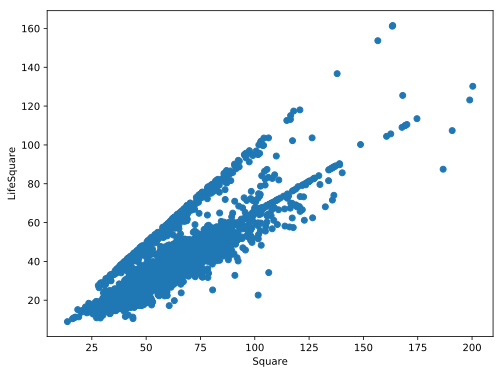

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter((train['Square']), train['LifeSquare'])
plt.xlabel('Square')
plt.ylabel('LifeSquare')

In [92]:
train.loc[(train['Square'] < train['KitchenSquare']), :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
5149  13703          42    1.0  38.071692   19.723548           73.0      9   
1064  14656          62    1.0  47.100719   46.447960         2014.0      4   
7088   6569          27    1.0  38.220258   18.716856           84.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
5149        10.0       2006   0.158249         B         B        21   
1064         1.0       2014   0.072158         B         B         2   
7088        17.0       2018   0.011654         B         B         4   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
5149      5731         0           NaN            1        0       B   
1064       629         1           NaN            0        0       A   
7088       915         0           NaN            0        0       B   

              Price  
5149  160488.033165  
1064  108337.484207  
7088   99079.960518

In [93]:
train['KitchenSquare'].describe()

count    6981.000000
mean        6.175763
std        24.623088
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max      2014.000000
Name: KitchenSquare, dtype: float64

In [94]:
train.loc[train['KitchenSquare'] == 2014, :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1064  14656          62    1.0  47.100719    46.44796         2014.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1064         1.0       2014   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1064       629         1           NaN            0        0       A   

              Price  
1064  108337.484207

In [95]:
train = train.loc[~(train['KitchenSquare'] == 2014), :]

In [96]:
train['KitchenSquare'].describe()

count    6980.000000
mean        5.888109
std         5.353443
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max       123.000000
Name: KitchenSquare, dtype: float64

In [97]:
train.loc[train['KitchenSquare'] > 50, :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
8232   7162          34    2.0   56.738764   36.880196           54.0     26   
227   16395           2    3.0   79.722243   44.731219           72.0     12   
5904    673          27    1.0   54.418214   51.498581           51.0     10   
1860   4265         161    2.0   53.216778   32.644859           53.0      7   
5149  13703          42    1.0   38.071692   19.723548           73.0      9   
5888  16593          52    2.0   64.859242   42.158507           62.0     15   
5162  11739          27    2.0   61.070298   59.845092           58.0      8   
9895   2737          27    3.0  123.430072   80.229547          123.0      5   
9889  12918          23    2.0   51.440463   33.436301           51.0      3   
1369   2371          27    2.0   68.841073   64.234956           66.0      4   
2969   7441          62    3.0  114.734473  112.589083          112.0      3   
4079   6508          23    2.0   67.146049   33.959154           63.0      5   
4651  12552          58    3.0  116.405693  113.109653          112.0      3   
6036  12666          34    2.0   60.603363   39.392186           58.0     14   
7088   6569          27    1.0   38.220258   18.716856           84.0      4   
2916  12390          72    3.0   97.490674   63.368938           96.0     22   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8232        25.0       2016   0.069753         B         B        53   
227         16.0       1987   0.130618         B         B        39   
5904        17.0       2017   0.072158         B         B         2   
1860        17.0       1994   0.000699         B         B        14   
5149        10.0       2006   0.158249         B         B        21   
5888        17.0       1977   0.371149         B         B        34   
5162        17.0       2016   0.072158         B         B         2   
9895        10.0       2015   0.017647         B         B         2   
9889        17.0       2017   0.005767         B         B         1   
1369         2.0       2014   0.017647         B         B         2   
2969         3.0       2015   0.072158         B         B         2   
4079        17.0       2019   0.034656         B         B         0   
4651         3.0       2016   0.437885         B         B        23   
6036        22.0       1977   0.069753         B         B        53   
7088        17.0       2018   0.011654         B         B         4   
2916        25.0       2019   0.210473         B         B        11   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8232     13670         4           NaN            1       11       B   
227      10418         9         900.0            1        9       B   
5904       629         1           NaN            0        0       A   
1860      3369        24        4129.0            0        3       B   
5149      5731         0           NaN            1        0       B   
5888      7065         1         750.0            2        5       B   
5162       629         1           NaN            0        0       A   
9895       469         0           NaN            0        0       B   
9889       388         0           NaN            0        0       B   
1369       469         0           NaN            0        0       B   
2969       629         1           NaN            0        0       A   
4079       168         0           NaN            0        0       B   
4651      5735         3        1084.0            0        5       B   
6036     13670         4           NaN            1       11       B   
7088       915         0           NaN            0        0       B   
2916      2398         2        1994.0            3        0       B   

              Price  
8232  244220.621495  
227   370148.625285  
5904  133273.635012  
1860  261125.669724  
5149  160488.033165  
5888  185993.474671  
5162  212188.959537  
9895  234194.837047  


In [98]:
train.loc[train['KitchenSquare'] < 3, :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
2731   1308          62    1.0  44.008402   28.605461            1.0      3   
478   10391          62    1.0  37.498161   24.373805            1.0     21   
9642  16202         105    1.0  22.072457   16.540036            2.0      4   
6081  10565          52    2.0  56.646658   36.820327            1.0     13   
752    9640          58    1.0  54.198661   49.527282            1.0      9   
5778  12815          23    1.0  35.084763   22.805096            1.0      9   
8795  12122          27    2.0  56.007234   36.404702            1.0     13   
8031  10851          53    1.0  40.155789   26.101263            1.0      5   
6358  16142           6    2.0  73.715074   47.914798            0.0     15   
2688   3229          38    1.0  86.988870   86.808704            1.0      8   
1026   5469          27    2.0  59.043236   38.378103            1.0      8   
6593   3676           1    2.0  66.290208   43.088635            1.0      8   
2359  15041          27    3.0  71.160510   46.254332            0.0      9   
774    8094           6    3.0  79.867477   75.085125            1.0      3   
9619   5496           6    3.0  78.914877   51.294670            1.0     12   
9411  10952          45    3.0  78.198416   50.828970            1.0      4   
3865    359          23    2.0  54.007172   53.839760            1.0      3   
9291  15165          74    2.0  83.259565   54.118717            1.0     12   
7373  15629           1    2.0  66.813104   43.428517            1.0     21   
6699  14659          74    2.0  66.944203   43.513732            1.0      8   
8149   2117           9    2.0  64.542131   41.952385            1.0     10   
6612   8199           9    2.0  67.981161   44.187754            1.0      9   
8615   6814          52    2.0  66.544692   43.254050            1.0      2   
2581   6425          45    3.0  80.797789   75.917792            1.0     14   
1993  13533          27    2.0  64.061829   41.640189            1.0     20   
2633  13297          23    2.0  54.146554   35.195260            1.0      5   
7911   1967          30    1.0  41.811075   27.177199            1.0     21   
2409    404           1    1.0  37.659760   24.478844            1.0     12   
5386  12177           6    3.0  74.368466   64.769517            1.0     14   
4560   9834          62    2.0  73.499532   47.774696            1.0      4   
...     ...         ...    ...        ...         ...            ...    ...   
5471  14059          30    2.0  67.442383   39.857260            1.0     17   
64     9723          52    2.0  64.141152   41.691749            1.0      5   
5284   6501          23    3.0  70.462149   45.800397            0.0      4   
7217   8137          30    2.0  67.133711   66.650183            1.0      3   
4895   8293           1    2.0  65.637127   42.664133            1.0      4   
7901   6985           6    2.0  62.440001   40.586000            1.0     10   
6448  14361           9    2.0  61.505245   39.978409            1.0      3   
7878   9538          23    2.0  63.588976   41.332835            1.0      7   
4303  12051           1    1.0  43.047682   27.980994            1.0      4   
161    4263          27    1.0  54.255191   51.135219            0.0      5   
5683   7139           1    1.0  40.091991   26.059794            1.0     18   
6882  14488          23    1.0  43.585159   28.330354            1.0      9   
9703  16651           6    2.0  63.259246   57.068879            1.0     13   
7998   5523          58    1.0  53.206828   34.584438            1.0     10   
1022  15120          27    2.0  65.109592   56.849526            1.0      2   
3949  16517          34    2.0  57.601494   54.004416            0.0     17   
6244  11734           1    1.0  47.087099   30.606615            0.0     10   
2617   1442          48    1.0  41.409461   41.246785            1.0      3   
7522   2769          23    2.0  61.873738   40.217930      

In [99]:
KitchenSquare_percent = round((train.loc[train['KitchenSquare'].between(3,60), 'KitchenSquare'] * 100 / train['Square']).median()) / 100
KitchenSquare_percent

0.15

In [100]:
train.loc[~(train['KitchenSquare'].between(3,55)), 'KitchenSquare'] = train['Square'] * KitchenSquare_percent

In [101]:
train.loc[train['Square'] < train['KitchenSquare'], 'KitchenSquare'].count()

0

In [102]:
valid.loc[~(valid['KitchenSquare'].between(3,55)), 'KitchenSquare'] = valid['Square'] * KitchenSquare_percent

In [103]:
valid.loc[valid['Square'] < valid['KitchenSquare'], 'KitchenSquare'].count()

0

In [104]:
test.loc[(test['Square'] < test['KitchenSquare']), :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1964  14594          11    2.0  42.795304   24.223770          620.0     11   
2424  10662          29    1.0  25.956829   17.251768           33.0      5   
3863   3194          29    2.0  43.926987   31.028707           44.0      6   
4555  12640           6    2.0  54.629142   31.486308           97.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1964        14.0       1972   0.038693         B         B        28   
2424         5.0       1973   0.069660         B         B        31   
3863         5.0       1964   0.086885         B         B        10   
4555        17.0       2015   0.243205         B         B         5   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
1964      6533         1        1015.0            2        5       B  
2424      6119         4           NaN            1        2       B  
3863      2277         2        1547.0            0        0       B  
4555      1564         0         540.0            0        0       B

In [105]:
test.loc[~(test['KitchenSquare'].between(3,55)), 'KitchenSquare'] = test['Square'] * KitchenSquare_percent

In [106]:
test.loc[(test['Square'] < test['KitchenSquare']), 'KitchenSquare'] = test['Square'] * KitchenSquare_percent

In [107]:
train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
5220   7884           0    3.0  81.297100   47.775293      10.000000     14   
4754   8590          46    2.0  59.783162   33.356818      11.000000     13   
2731   1308          62    1.0  44.008402   28.605461       6.601260      3   
478   10391          62    1.0  37.498161   24.373805       5.624724     21   
1330   8387          99    2.0  45.512229   30.760445       6.000000     10   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
5220        22.0       2009   0.319809         B         B        25   
4754        14.0       2003   0.000000         B         B        47   
2731        12.0       2017   0.072158         B         B         2   
478         25.0       1977   0.072158         B         B         2   
1330         9.0       1972   0.012339         B         B        35   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
5220      4756        16        2857.0            5        8       B   
4754     11319         0        1145.0            3        5       B   
2731       629         1           NaN            0        0       A   
478        629         1           NaN            0        0       A   
1330      5776         1        2078.0            2        4       B   

              Price  
5220  113607.108308  
4754  341297.317204  
2731  124349.824728  
478   131037.880968  
1330  181197.701015

In [108]:
train['KitchenSquare'].min()

2.417573141787536

In [109]:
train['KitchenSquare'].max()

54.0

In [110]:
train['KitchenSquare'].median()

8.0

In [111]:
train['KitchenSquare'].mean()

8.363567608439393

In [112]:
train.loc[train['KitchenSquare'] == 0, :]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [113]:
valid.loc[valid['KitchenSquare'] == 0, :].count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [114]:
test.loc[test['KitchenSquare'] == 0, :].count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

Text(0, 0.5, 'KitchenSquare')

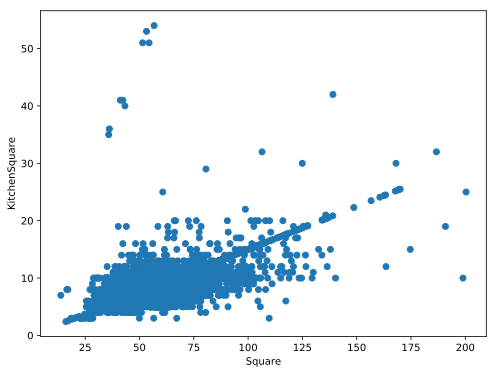

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter((train['Square']), train['KitchenSquare'])
plt.xlabel('Square')
plt.ylabel('KitchenSquare')

### Чистим этажи

In [116]:
train.loc[train['Floor'] > train['HouseFloor'], 'Id'].count()

1242

In [117]:
valid.loc[valid['Floor'] > valid['HouseFloor'], 'Id'].count()

569

In [118]:
test.loc[test['Floor'] > test['HouseFloor'], 'Id'].count()

884

In [119]:
train['Floor'].max()

42

In [120]:
train['Floor'].min()

1

In [121]:
train['HouseFloor'].max()

99.0

In [122]:
train['HouseFloor'].min()

0.0

In [123]:
train.loc[(train['HouseFloor'] > 0) | (train['HouseFloor'] < 99), 'HouseFloor'].median()

12.0

In [124]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train.loc[(train['HouseFloor'] > 0) 
                                                              | (train['HouseFloor'] < 99), 'HouseFloor'].median()

In [125]:
valid.loc[valid['HouseFloor'] == 0, 'HouseFloor'].count()

85

In [126]:
test.loc[test['HouseFloor'] == 0, 'HouseFloor'].count()

131

In [127]:
valid.loc[valid['HouseFloor'] == 0, 'HouseFloor'] = train.loc[(train['HouseFloor'] > 0) 
                                                              | (train['HouseFloor'] < 99), 'HouseFloor'].median()

In [128]:
test.loc[test['HouseFloor'] == 0, 'HouseFloor'] = train.loc[(train['HouseFloor'] > 0) 
                                                              | (train['HouseFloor'] < 99), 'HouseFloor'].median()

In [129]:
train = train.loc[train['HouseFloor'].between(1, 40), :]

In [130]:
valid.loc[(~valid['HouseFloor'].between(1, 40)), :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4323  6589          30    1.0  62.110823   52.812128       4.000000     31   
8854    78          30    2.0  65.773749   42.752937       9.866062      8   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4323        44.0       2009   0.000078         B         B        22   
8854       117.0       1977   0.000078         B         B        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4323      6398       141        1046.0            3       23       B   
8854      6398       141        1046.0            3       23       B   

              Price  
4323  117647.461002  
8854  207248.370520

In [131]:
valid.loc[(~valid['HouseFloor'].between(1, 40)), 'HouseFloor'] = train['HouseFloor'].max()

In [132]:
test.loc[(~test['HouseFloor'].between(1, 40)), :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
651   15864          27    3.0   47.722835   47.098813            9.0     18   
1587   5707          76    2.0   73.363523   38.740060            5.0     38   
3711    414          76    2.0   67.609808   41.175948            5.0     46   
3909   1397          76    3.0  221.138768  118.055342            4.0     32   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
651         99.0       1977   0.072158         B         B         2   
1587        48.0       2010   0.000000         B         B         7   
3711        48.0       2002   0.000000         B         B         7   
3909        48.0       2011   0.000000         B         B         7   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
651        629         1           NaN            0        0       A  
1587      1660        39        1786.0            1        5       B  
3711      1660        39        1786.0            1        5       B  
3909      1660        39        1786.0            1        5       B

In [133]:
test.loc[test['HouseFloor'] == 99, 'HouseFloor'] = train['HouseFloor'].max()

In [134]:
train.shape

(6974, 20)

In [135]:
train.loc[train['Floor'] > train['HouseFloor'], 'Floor'].count()

1107

In [136]:
train.loc[train['Floor'] > train['HouseFloor'], 'Floor'] = train['HouseFloor']

In [137]:
train.loc[train['Floor'] > train['HouseFloor'], 'Floor'].count()

0

In [138]:
valid.loc[valid['Floor'] > valid['HouseFloor'], 'Floor'].count()

503

In [139]:
valid.loc[valid['Floor'] > valid['HouseFloor'], 'Floor'] = valid['HouseFloor']

In [140]:
train.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   6974.000000  6974.000000  6974.000000  6974.000000  6974.000000   
mean    8431.740895    50.573416     1.887439    56.119980    36.331841   
std     4858.326377    43.644898     0.810854    18.896501    14.840172   
min        0.000000     0.000000     1.000000    13.784865     8.960162   
25%     4241.250000    18.000000     1.000000    41.754133    25.115402   
50%     8456.500000    37.000000     2.000000    52.323724    33.234064   
75%    12636.750000    75.000000     2.000000    65.882974    44.536535   
max    16798.000000   209.000000     5.000000   200.334539   161.504222   

       KitchenSquare        Floor   HouseFloor     HouseYear    Ecology_1  \
count    6974.000000  6974.000000  6974.000000  6.974000e+03  6974.000000   
mean        8.362333     7.895899    12.886579  4.859959e+03     0.119792   
std         3.072220     5.179586     6.209859  2.400899e+05     0.119896   
min         2.417573     1.000000     1.000000  1.912000e+03     0.000000   
25%         6.000000     4.000000     9.000000  1.973000e+03     0.017647   
50%         8.000000     7.000000    12.000000  1.977000e+03     0.075424   
75%        10.000000    11.000000    17.000000  2.000000e+03     0.195781   
max        54.000000    37.000000    40.000000  2.005201e+07     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  6974.000000   6974.000000  6974.000000   3690.000000  6974.000000   
mean     24.584600   5302.085030     7.838113   1146.957995     1.320906   
std      17.365325   3932.993282    23.320408   1028.650953     1.489281   
min       0.000000    168.000000     0.000000      0.000000     0.000000   
25%       6.000000   1564.000000     0.000000    350.000000     0.000000   
50%      25.000000   5285.000000     2.000000    900.000000     1.000000   
75%      35.000000   7077.000000     5.000000   1548.000000     2.000000   
max      74.000000  19083.000000   141.000000   4849.000000     6.000000   

           Shops_1          Price  
count  6974.000000    6974.000000  
mean      4.195153  214300.660185  
std       4.740527   92855.960081  
min       0.000000   59174.778028  
25%       1.000000  153824.743388  
50%       3.000000  192476.219671  
75%       5.750000  249060.291228  
max      23.000000  633233.466570

### Чистим год

In [141]:
train['HouseYear'].max()

20052011

In [142]:
train.loc[train['HouseYear'] > 2020, :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4189  11607         147    2.0  44.791836   28.360393            5.0    4.0   
1497  10814         109    1.0  37.265070   20.239714            9.0    9.0   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4189         9.0       4968   0.319809         B         B        25   
1497        12.0   20052011   0.136330         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4189      4756        16        2857.0            5        8       B   
1497      6141        10         262.0            3        6       B   

              Price  
4189  243028.603096  
1497  254084.534396

In [143]:
valid.loc[valid['HouseYear'] > 2020, :]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [144]:
test.loc[test['HouseYear'] > 2020, :]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2]
Index: []

In [145]:
train.loc[train['HouseYear'] > 2020, 'HouseYear'] = train['HouseYear'].median()

In [146]:
train.loc[train['HouseYear'] > 2020, :]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

### Чистим остальные параметры

In [147]:
train['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [148]:
train.loc[train['Ecology_2'] == 'A', 'Ecology_2'] = 0

In [149]:
train.loc[train['Ecology_2'] == 'B', 'Ecology_2'] = 1

In [150]:
train.loc[train['Ecology_3'] == 'A', 'Ecology_3'] = 0

In [151]:
train.loc[train['Ecology_3'] == 'B', 'Ecology_3'] = 1

In [152]:
train['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [153]:
train.loc[train['Shops_2'] == 'A', 'Shops_2'] = 0

In [154]:
train.loc[train['Shops_2'] == 'B', 'Shops_2'] = 1

In [155]:
valid.loc[valid['Ecology_2'] == 'A', 'Ecology_2'] = 0

In [156]:
valid.loc[valid['Ecology_2'] == 'B', 'Ecology_2'] = 1

In [157]:
valid.loc[valid['Ecology_3'] == 'A', 'Ecology_3'] = 0

In [158]:
valid.loc[valid['Ecology_3'] == 'B', 'Ecology_3'] = 1

In [159]:
test.loc[test['Ecology_2'] == 'A', 'Ecology_2'] = 0

In [160]:
test.loc[test['Ecology_2'] == 'B', 'Ecology_2'] = 1

In [161]:
test.loc[test['Ecology_3'] == 'A', 'Ecology_3'] = 0

In [162]:
test.loc[test['Ecology_3'] == 'B', 'Ecology_3'] = 1

In [163]:
valid.loc[valid['Shops_2'] == 'A', 'Shops_2'] = 0

In [164]:
valid.loc[valid['Shops_2'] == 'B', 'Shops_2'] = 1

In [165]:
test.loc[test['Shops_2'] == 'A', 'Shops_2'] = 0

In [166]:
test.loc[test['Shops_2'] == 'B', 'Shops_2'] = 1

### Чистим выбросы по цене

In [167]:
train.groupby(['DistrictId', 'Rooms'])[['Price']].mean()

Price
DistrictId Rooms               
0          1.0    145921.254269
           2.0    209588.635330
           3.0    261329.256480
1          1.0    146864.194546
           2.0    199679.714045
           3.0    245731.203021
           4.0    277290.705058
2          1.0    176641.531553
           2.0    239484.414355
           3.0    332895.556041
           4.0    294405.899542
3          1.0    153308.868193
           2.0    190113.452471
           3.0    217229.328206
4          1.0    168150.110362
           2.0    260449.038197
           3.0    325433.289666
           4.0    197302.241882
5          1.0    207947.191831
           2.0    235345.720406
           3.0    245417.090604
6          1.0    135716.920350
           2.0    175643.617180
           3.0    213675.264491
7          1.0    181384.704582
           2.0    240080.510661
           3.0    324350.921625
8          1.0    164183.460873
           2.0    205900.207036
           3.0    311543.589160
...                         ...
186        2.0    352568.950222
187        1.0    139937.873282
           3.0    245085.646118
188        1.0    245265.492111
           2.0    323906.781743
189        1.0    228411.559126
           2.0    225960.873190
           3.0    335134.450010
190        2.0    459372.600551
           3.0    543152.927826
191        1.0    196469.010109
           2.0    313741.659045
           3.0    313560.214377
192        1.0    137505.343314
           2.0    211145.979862
193        1.0    130500.697853
           2.0    181025.397125
           3.0    350956.508822
194        2.0    224732.319843
           3.0    478782.488421
195        5.0    479525.147323
200        1.0    236117.331945
           2.0    244300.906533
           3.0    548608.808262
201        1.0    341805.242387
           2.0    261645.935295
202        3.0    286215.863552
205        1.0    220501.566180
208        2.0    433346.419160
209        1.0    140048.802277

[620 rows x 1 columns]

Text(0, 0.5, 'Price')

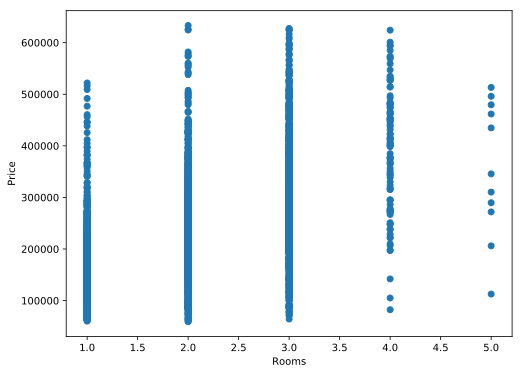

In [168]:
plt.figure(figsize=(8, 6))
plt.scatter(train['Rooms'], train['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

In [169]:
train.groupby(['Rooms'])[['Price']].max()

Price
Rooms               
1.0    521829.550445
2.0    633233.466570
3.0    627525.072788
4.0    624156.003381
5.0    513239.499082

In [170]:
train.groupby(['Rooms'])[['Price']].min()

Price
Rooms               
1.0     60502.583500
2.0     59174.778028
3.0     64298.216337
4.0     82342.775873
5.0    112693.641769

In [171]:
train.loc[(~train['Price'].between(30000, 600000)), :].count()

Id               12
DistrictId       12
Rooms            12
Square           12
LifeSquare       12
KitchenSquare    12
Floor            12
HouseFloor       12
HouseYear        12
Ecology_1        12
Ecology_2        12
Ecology_3        12
Social_1         12
Social_2         12
Social_3         12
Healthcare_1     10
Helthcare_2      12
Shops_1          12
Shops_2          12
Price            12
dtype: int64

In [172]:
train = train.loc[train['Price'].between(30000, 600000), :]

In [173]:
valid.loc[(~valid['Price'].between(30000, 600000)), :].count()

Id               8
DistrictId       8
Rooms            8
Square           8
LifeSquare       8
KitchenSquare    8
Floor            8
HouseFloor       8
HouseYear        8
Ecology_1        8
Ecology_2        8
Ecology_3        8
Social_1         8
Social_2         8
Social_3         8
Healthcare_1     6
Helthcare_2      8
Shops_1          8
Shops_2          8
Price            8
dtype: int64

In [174]:
district_stat = train.groupby(['DistrictId', 'Rooms'])[['Price']].mean().reset_index().rename(columns={'Price':'mean_price'})

In [175]:
district_stat.shape

(619, 3)

In [176]:
train = pd.merge(train, district_stat, on=['DistrictId', 'Rooms'], how='left')

In [177]:
train['mean_price'].isnull().sum()

0

In [178]:
valid = pd.merge(valid, district_stat, on=['DistrictId', 'Rooms'], how='left')

In [179]:
valid['mean_price'].isnull().sum()

57

In [180]:
room_stat = train.groupby(['Rooms'])[['Price']].mean().reset_index().rename(columns={'Price': 'mean_price2'})

In [181]:
train = pd.merge(train, room_stat, on='Rooms', how='left')

In [182]:
valid = pd.merge(valid, room_stat, on='Rooms', how='left')

In [183]:
valid['Rooms'].max()

5.0

In [184]:
train['Rooms'].max()

5.0

In [185]:
test['Rooms'].max()

6.0

In [186]:
train.loc[train['Rooms'] == 5, 'Price'].mean()

356514.6353517018

In [187]:
valid['mean_price'] = valid['mean_price'].fillna(valid['mean_price2'])

In [188]:
test = pd.merge(test, district_stat, on=['DistrictId', 'Rooms'], how='left')

In [189]:
test = pd.merge(test, room_stat, on='Rooms', how='left')

In [190]:
test.loc[test['mean_price2'].isnull(), :]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2071  10793          23    6.0  110.750226   71.987647      16.612534      2   
3217   4058          27    6.0  223.453689  104.113552      16.000000      2   

      HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  \
2071         2.0       2015   0.014073          1          1         2   
3217         2.0       2017   0.041116          1          1        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  \
2071       475         0           NaN            0        0        1   
3217     14892         4           NaN            1        4        1   

      mean_price  mean_price2  
2071         NaN          NaN  
3217         NaN          NaN

In [191]:
test.loc[test['Rooms'] == 6, 'mean_price2'] = train.loc[train['Rooms'] == 5, 'Price'].mean()

In [192]:
test['mean_price'] = test['mean_price'].fillna(test['mean_price2'])

Text(0, 0.5, 'Price')

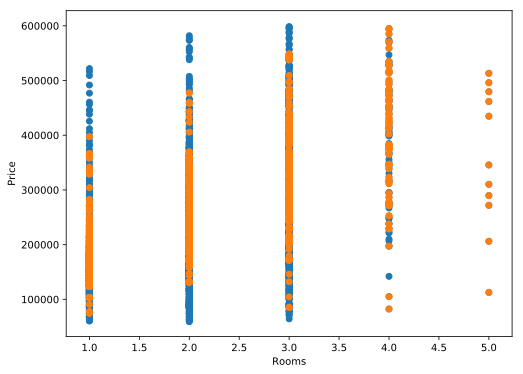

In [193]:
plt.figure(figsize=(8, 6))
plt.scatter(train['Rooms'], train['Price'])
plt.scatter(train['Rooms'], train['mean_price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

### Сторим модель

In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962 entries, 0 to 6961
Data columns (total 22 columns):
Id               6962 non-null int64
DistrictId       6962 non-null int64
Rooms            6962 non-null float64
Square           6962 non-null float64
LifeSquare       6962 non-null float64
KitchenSquare    6962 non-null float64
Floor            6962 non-null float64
HouseFloor       6962 non-null float64
HouseYear        6962 non-null float64
Ecology_1        6962 non-null float64
Ecology_2        6962 non-null int64
Ecology_3        6962 non-null int64
Social_1         6962 non-null int64
Social_2         6962 non-null int64
Social_3         6962 non-null int64
Healthcare_1     3680 non-null float64
Helthcare_2      6962 non-null int64
Shops_1          6962 non-null int64
Shops_2          6962 non-null int64
Price            6962 non-null float64
mean_price       6962 non-null float64
mean_price2      6962 non-null float64
dtypes: float64(12), int64(10)
memory usage: 1.2 MB


In [195]:
feats = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'mean_price']

In [196]:
parameters = [{'n_estimators': [150, 200, 250], 
               'max_features': np.arange(3, 17),
               'max_depth': np.arange(5, 18)}]

In [197]:
clf = GridSearchCV(estimator=RF(random_state=42, n_jobs=-1), 
                   param_grid=parameters,
                   scoring='r2',
                   cv=5)

In [198]:
clf.fit(train.loc[:, feats], train['Price'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [150, 200, 250], 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [199]:
clf.best_params_

{'max_depth': 14, 'max_features': 8, 'n_estimators': 200}

In [200]:
clf.best_score_

0.7675167434969643

In [201]:
clf = RF(max_depth = 14, max_features = 8, n_estimators = 200, random_state=42, n_jobs=-1)
clf.fit(train.loc[:, feats], train['Price'])
valid_pred = clf.predict(valid.loc[:, feats])

In [202]:
r2_valid = r2(valid['Price'], valid_pred)
r2_valid

0.7049096965206938

In [203]:
test_pred = clf.predict(test.loc[:, feats])

In [204]:
test_pred.shape

(5000,)

In [205]:
test['Price'] = test_pred

In [206]:
test.loc[:, ['Id', 'Price']].to_csv('AMalykhina_predictions.csv', index=None)